In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

### Given Data

In [210]:
# Energies in keV
E = 662
rest_mass_energy = 511

# Distances in cm
r1 = 5.59
r2 = 34.2
rprime = 40.3
rout = 11.681/2
rin = 10.692/2
width = 0.83

# Time in s
time_total = 1800

# Constants
NA = 6e23

In [42]:
data_Cs_a = np.loadtxt('cs137.txt')
data_Cs_b = np.loadtxt('cs137Back.txt')
data_Cs_c = np.loadtxt('cs137Ring.txt')
data_Co = np.loadtxt('Co60.txt')

x_Cs_a = np.arange(1,np.size(data_Cs_a)+1)
x_Cs_b = np.arange(1,np.size(data_Cs_b)+1)
x_Cs_c = np.arange(1,np.size(data_Cs_c)+1)
x_Co = np.arange(1,np.size(data_Co)+1)

### Theoretical Calculation

In [32]:
theta1 = np.arctan(r1/rprime)
theta2 = np.arctan(r1/r2)
theta = theta1 + theta2

Eprime = E/(1+E*(1-np.cos(theta))/rest_mass_energy)

In [35]:
3.7e7*1.1*np.exp(-0.693*58/30)

10659250.348118097

In [227]:
rho_copper = 8.96    # g/cm^3
ring_volume = np.pi*(rout**2 - rin**2)*width    # in cm^3
ring_cross_section = np.pi*rin**2 # in cm^2
m_copper = 63.546
mu1 = mu2 = 0.03    # in cm^2/g

# Diameter of the crystal detector is 2 inches = 5.08 cm
r_D = 5.08/2
A = np.pi*r_D**2

# Number of atoms
N = NA*rho_copper*ring_volume/m_copper
Omega_D = A*np.cos(theta)/(r1**2 + r2**2)

In [240]:
Omega_S = np.pi*r1**2/(rprime)**2
Omega_S

0.06044541952640508

### Analysis of Cobalt

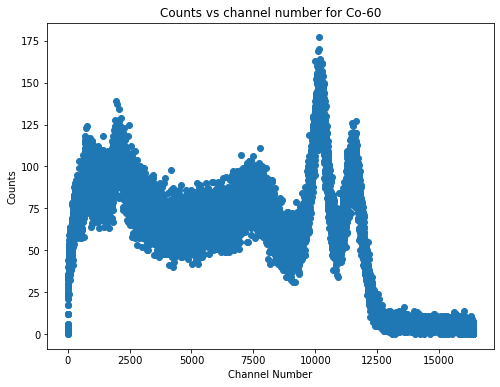

In [76]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Co-60')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Co, data_Co)
plt.show()

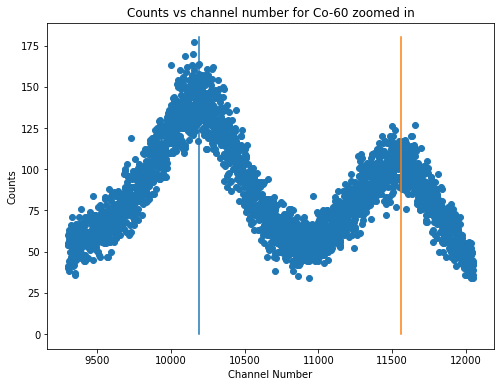

In [84]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Co-60 zoomed in')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Co[9300:12050], data_Co[9300:12050])
channel1 = 10190
channel2 = 11560
plt.plot(channel1*np.ones(10), np.arange(10)*20)
plt.plot(channel2*np.ones(10), np.arange(10)*20)
plt.show()

In [156]:
np.sum(data_Co[9300:12050])

234778.0

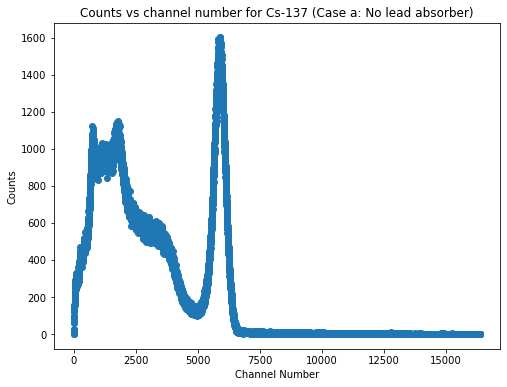

In [89]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (Case a: No lead absorber)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_a, data_Cs_a)
plt.show()

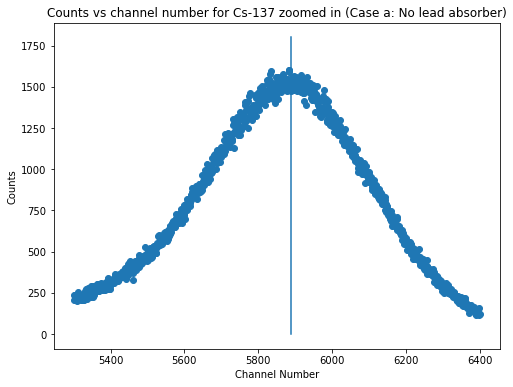

In [90]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 zoomed in (Case a: No lead absorber)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_a[5300:6400], data_Cs_a[5300:6400])
channel3 = 5890
plt.plot(channel3*np.ones(10), np.arange(10)*200)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (Case b: Lead absorber is present)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_b, data_Cs_b)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 zoomed in (Case b: Lead absorber is present)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_b[5000:6700], data_Cs_b[5000:6700])
channel3 = 5890
plt.plot(channel3*np.ones(10), np.arange(10)*5)
plt.show()

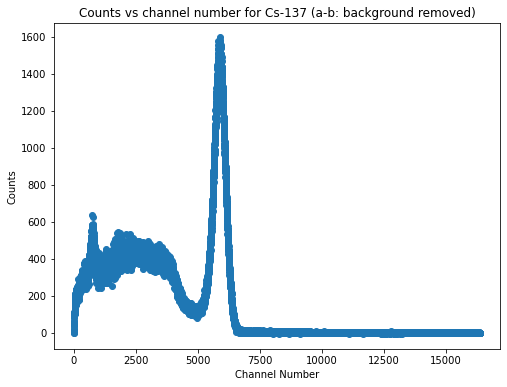

In [166]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (a-b: background removed)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_a, data_Cs_a - data_Cs_b)
plt.show()

In [234]:
counts_photopeak = np.sum(data_Cs_a[5300:6400] - data_Cs_b[5300:6400])
counts_total = np.sum(data_Cs_a - data_Cs_b)
print(counts_photopeak)
print(counts_total)
epsilon = counts_total/np.sum(data_Cs_a)
print(epsilon)
print((np.sqrt(counts_total)/counts_total + np.sqrt(np.sum(data_Cs_a))/np.sum(data_Cs_a))*epsilon)

877190.0
2625688.0
0.6734693615823948
0.0007566990276718529


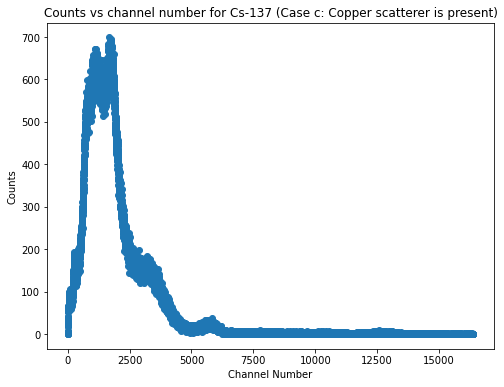

In [99]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (Case c: Copper scatterer is present)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_c, data_Cs_c)
plt.show()

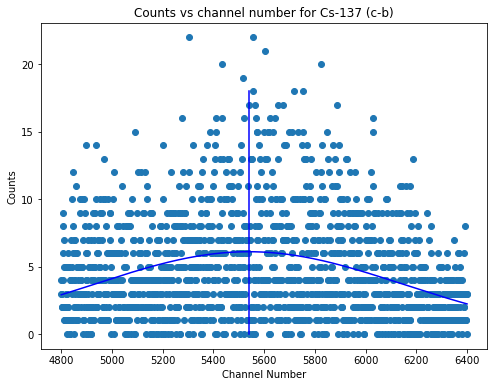

5539.3494078616395 606.5283874072265


In [185]:
def single_peak(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/2/sigma**2)

start = 4800
end = 6400

popt_gaus_Cs, pcov_gaus_Cs = curve_fit(single_peak, x_Cs_a[start:end], np.abs(data_Cs_c[start:end] - data_Cs_b[start:end]), p0=[20,5600,1])
perr_gaus_Cs = np.sqrt(np.diag(pcov_gaus_Cs))

plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (c-b)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.plot(x_Cs_a[start:end], single_peak(x_Cs_a[start:end], *popt_gaus_Cs), c='b')
plt.scatter(x_Cs_c[start:end], np.abs(data_Cs_c[start:end] - data_Cs_b[start:end]))
channel4 = np.round(popt_gaus_Cs[1])
plt.plot(channel4*np.ones(10), (np.arange(10))*2, c='b')
plt.show()
print(popt_gaus_Cs[1], popt_gaus_Cs[2])

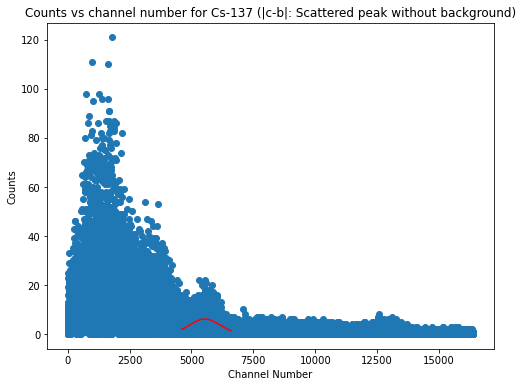

In [247]:
plt.figure(figsize=(8,6))
plt.title('Counts vs channel number for Cs-137 (|c-b|: Scattered peak without background)')
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.scatter(x_Cs_c, np.abs(data_Cs_c - data_Cs_b))
plt.plot(x_Cs_a[start-200:end+200], single_peak(x_Cs_a[start-200:end+200], *popt_gaus_Cs), c='r')
plt.show()

In [193]:
scattered_counts_photopeak = np.sum(data_Cs_c[start:end] - data_Cs_b[start:end])
print(scattered_counts_photopeak)

4341.0


### Photofraction

In [215]:
eta = counts_photopeak/counts_total
N_S = scattered_counts_photopeak/time_total

transmission_factor = np.exp(-(mu1+mu2)*width*(rho_copper)/2)

In [224]:
np.cos(theta)

0.9553814536348032

In [220]:
print(np.sqrt(scattered_counts_photopeak)/time_total)

deltaeta = eta*(np.sqrt(counts_photopeak)/counts_photopeak + np.sqrt(counts_total)/counts_total)
print(deltaeta)

0.03660348091117585
0.0005628721708753786


### Calibration Curve, FWHM and Energy Resolution Calculation

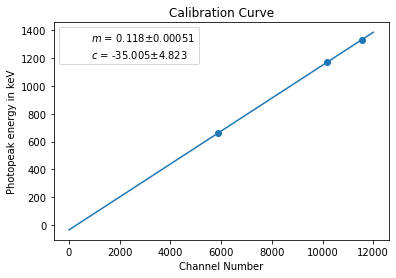

In [149]:
def lin_fit(x, m, c):
    return m*x + c

X = np.array([5890, 10190, 11560]) #channel number
Y = np.array([662, 1173.2, 1332.5]) #in keV

X2 = np.linspace(0,12000)

popt_lin, pcov_lin = curve_fit(lin_fit, X, Y)
perr_lin = np.sqrt(np.diag(pcov_lin))

plt.title('Calibration Curve')
plt.xlabel('Channel Number')
plt.ylabel('Photopeak energy in keV')
plt.scatter(X,Y)
plt.plot(X2, lin_fit(X2, *popt_lin))
plt.plot([], [], ' ', label='$m$ = ' + str(np.round(popt_lin[0],3)) + '$\pm$' + str(np.round(perr_lin[0],5)))
plt.plot([], [], ' ', label='$c$ = ' + str(np.round(popt_lin[1],3)) + '$\pm$' + str(np.round(perr_lin[1],3)))
plt.legend()
plt.show()

In [191]:
m = popt_lin[0]
c = popt_lin[1]
deltam = perr_lin[0]
deltac = perr_lin[1]

print(m*np.round(popt_gaus_Cs[1])+c)
print(deltam*np.round(popt_gaus_Cs[1])+deltac + np.round(popt_gaus_Cs[2])*m)

620.8403726771127
79.50011286393548


In [245]:
4*np.pi/1.065e7*N_S/N/eta/0.673/Omega_D*r1**2*transmission_factor

1.6080205670206574e-26

In [246]:
4*np.pi/1.065e7*N_S/N/eta/0.673/Omega_D*transmission_factor*r1**2*(0.0005/eta + 0.0007/epsilon + 0.036/2.411)

2.808826792761636e-28